# Bonus: computation of the cross-correlation as a measure of registration quality

Ones we have an image registration algorithm, we need to estimate its quality. One of the simplest yet effective way to do that is to compute cross-correlation between two images. Let's see how it can be done.

In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from PIL import Image

from utils import normxcorr2, rotate_image

Suppose we have two microscopy images, which need to be registred. In our case, we will load one image and obtain the other by rotating the first one. This way we will simulate typical rigid (affine) setup.

In [3]:
# Load out example image and rotate it
img1 = cv2.imread('data/micro_example.png', 0)
img2 = rotate_image(img1, -45)

# Convert the images to float32 data type
img1 = np.float32(img1)
img2 = np.float32(img2)

Let's plot the initial image and several rotation options. Note that both image rotation and cross-correlation computation are extracted in supplimentary .py files. Feel free to check them to better understand these algorithms.

Here we will plot cross-correlation values over corresponding images. 

0.02664645567590734
0.02317310565927028
0.016593468572396044


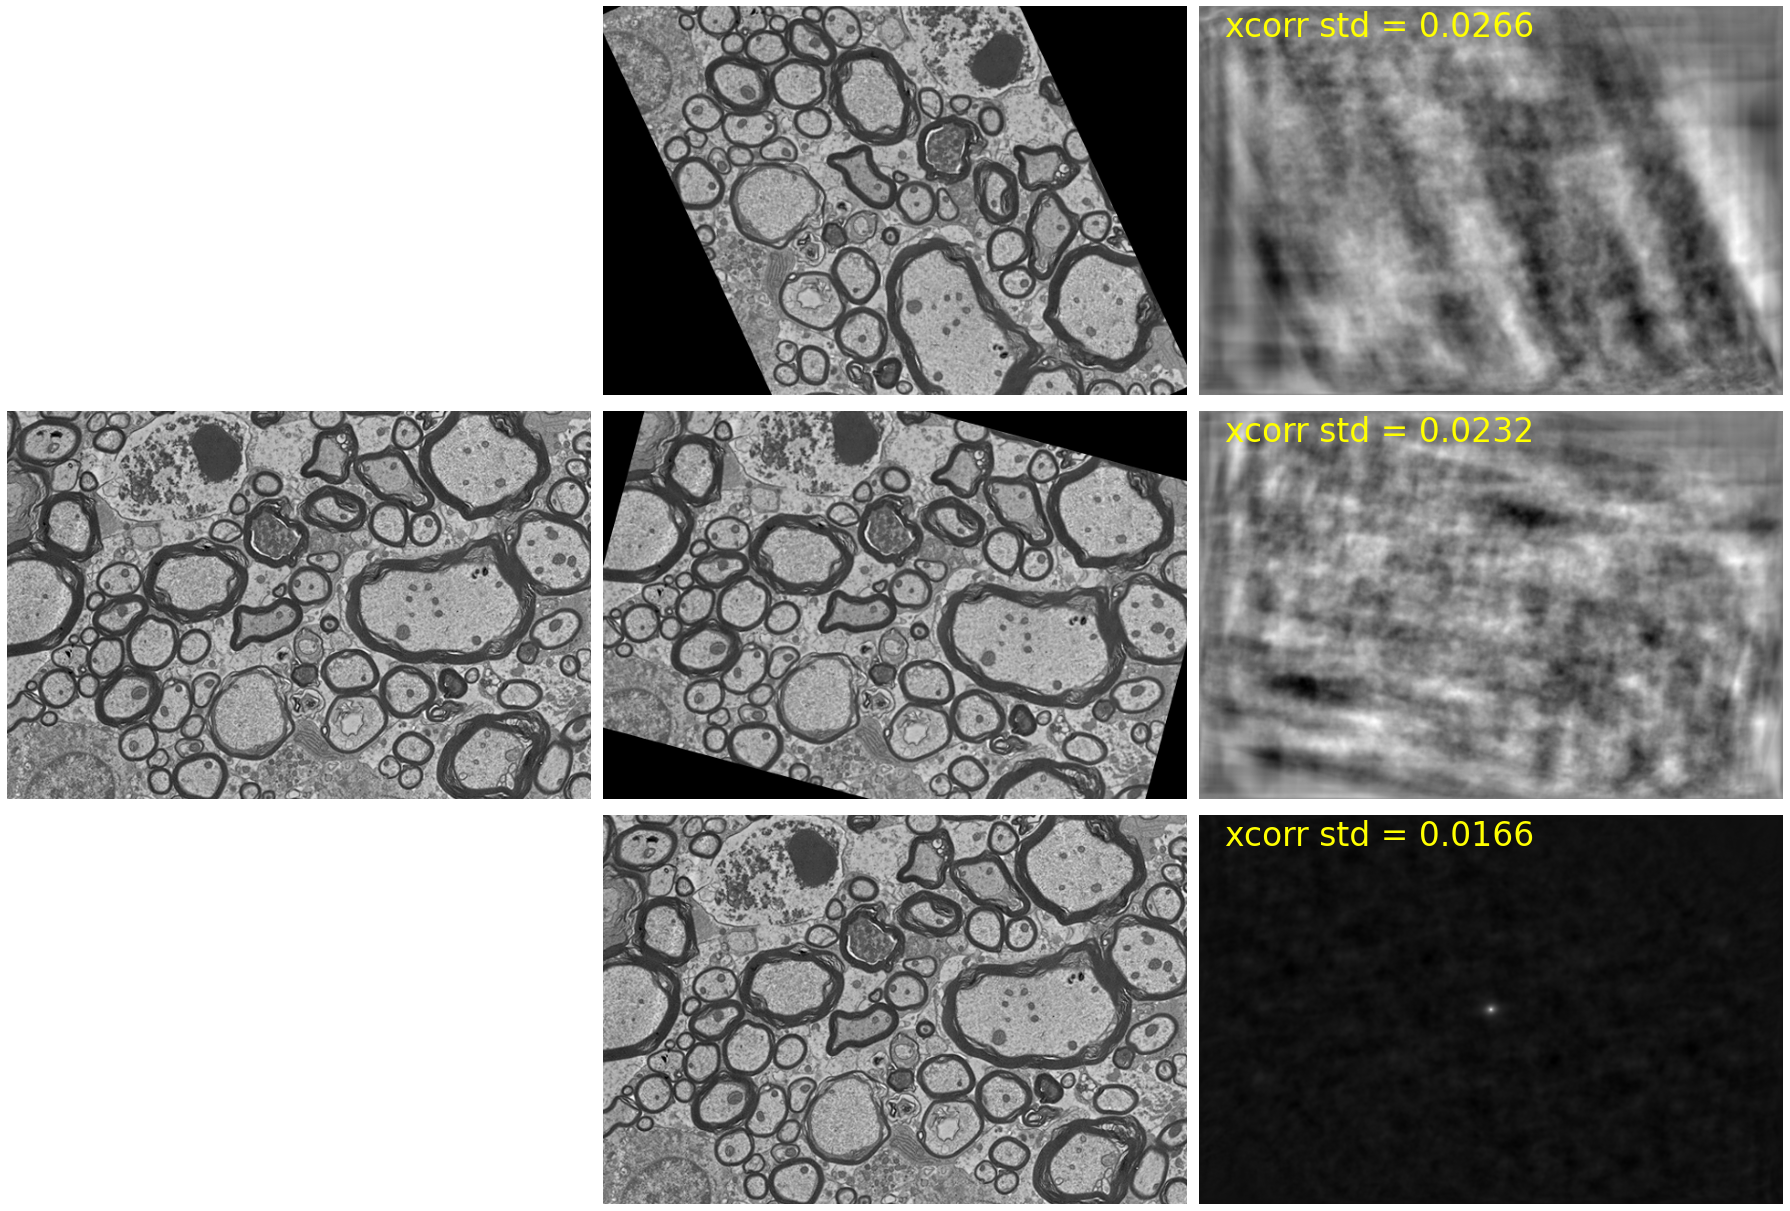

In [32]:
plt.figure(figsize=(25, 17))
n_cols = 3
angles = [-65, -15, 0]
n_rows = len(angles)
for i, angle in enumerate(angles):
    if i == 1:
        plt.subplot(n_rows, n_cols, (i * n_cols) + 1)
        plt.imshow(img1, cmap='gray')
        plt.axis('off')
    plt.subplot(n_rows, n_cols, (i * n_cols) + 2)
    img2 = rotate_image(img1, angle)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.subplot(n_rows, n_cols, (i * n_cols) + 3)
    xcorr = normxcorr2(img1, img2)
    print(np.std(xcorr))
    plt.imshow(xcorr, cmap='gray')
    plt.text(55, 65, f"xcorr std = {round(np.std(xcorr), 4)}", fontsize=33, c='yellow')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

Note that cross-correlation values become smaller for lower rotation angles, which means that they somewhat correspond to the quality of registration. In practice, it means that ones we do our registration, we can use cross-correlation to estimate its quality. If, at the end, we will be able to judge on registration quality based on the obtained values.